In [1]:
import yaml 
with open('fish1.yml', 'r') as mfile:
    fish1 = yaml.safe_load(mfile)

with open('fish5.yml', 'r') as mfile:
    fish5 = yaml.safe_load(mfile)

with open('fish10a.yml', 'r') as mfile:
    fish10a = yaml.safe_load(mfile)

with open('fish10b.yml', 'r') as mfile:
    fish10b = yaml.safe_load(mfile)

    

tfish1={"1338":0,"2100":285017,"0400":518991}
tfish5={"2100":270569,"1405":0,"0400":504528}
tfish10a={"2100":270490,"1405":0,"0400":504473}
tfish10b={"2100":204719,"1405":0,"0400":438694}

f5 = fish5 #the shortest fish run
f1tmp = fish1[int(tfish1['2100']-(tfish10a['2100']+tfish5['2100'])/2):]
f1 = f1tmp[:len(f5)]
f10 = fish10a[0:len(f5)]
f10a = fish10a[int(tfish10a['2100']-tfish10b['2100']):-1]
f10b = fish10b[:len(f10a)]


/home/mix/.conda/envs/track/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


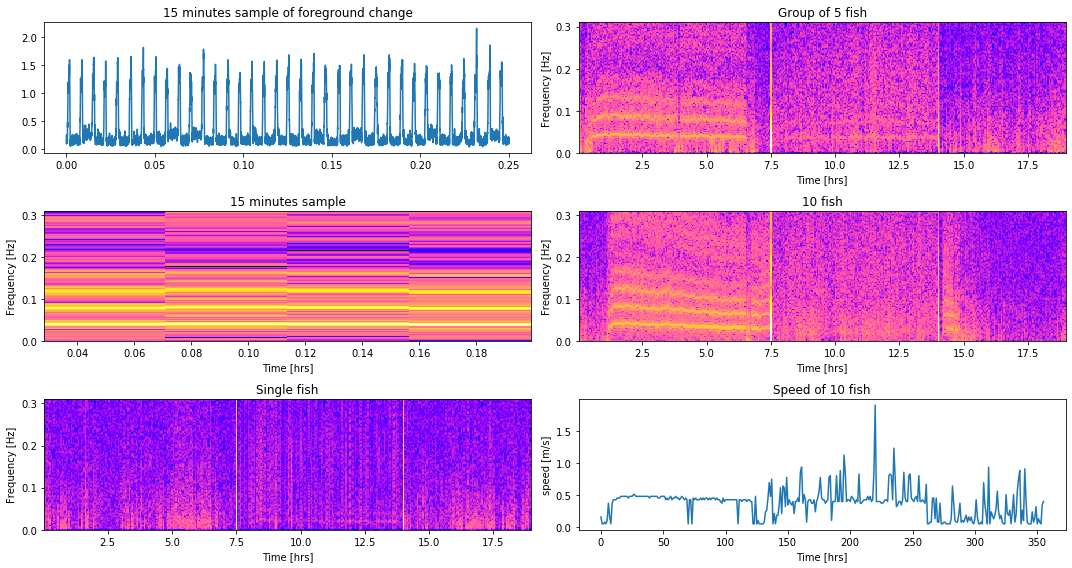

In [98]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
fs = 10 #a smpling frequency, our camera's input fps

l=len(f1)
time = np.array(range(0,l))/(3600*fs)

f5p = 10*np.log10(np.array(f5))
f5p = np.array(f5)
f1p = np.array(f1)
f10p = np.array(f10)


min15sample = np.array(f10[int(36000*2.5):int(36000*(2.5+(0.25)))])

# Plots
fig, axes = plt.subplots(3, 2, figsize=(15, 8))

frequencies5, times, spectrogram5 = signal.spectrogram(f5p, fs,nfft=4096,nperseg=2048,noverlap = 128)
frequencies1, times, spectrogram1 = signal.spectrogram(f1p, fs,nfft=4096,nperseg=2048,noverlap = 128)
frequencies10, times, spectrogram10 = signal.spectrogram(f10p, fs,nfft=4096,nperseg=2048,noverlap = 128)


frequencies15min, times15min, spectrogram15min = signal.spectrogram(min15sample, fs,nfft=4096,nperseg=2048,
                                                                    noverlap = 512)

cmap = plt.get_cmap('gnuplot2')
end = int(len(frequencies1)/16) #only show low frequencies where movement happens



#axes[row, column]
axes[0, 0].plot(time[:len(min15sample)],min15sample)
axes[0, 0].set_title("15 minutes sample of foreground change")

axes[1, 0].set_ylabel('[%] of image foreground change')
axes[1, 0].set_ylabel('Time [hrs]')
axes[1, 0].pcolormesh(times15min/3600, frequencies15min[:end], 10*np.log10(spectrogram15min[:end]), cmap=cmap)
axes[1, 0].set_title("15 minutes sample")
axes[1, 0].set_ylabel('Frequency [Hz]')
axes[1, 0].set_xlabel('Time [hrs]')

axes[2, 0].pcolormesh(times/3600, frequencies1[:end], 10*np.log10(spectrogram1[:end]), cmap=cmap)
axes[2, 0].set_title("Single fish")
axes[2, 0].set_ylabel('Frequency [Hz]')
axes[2, 0].set_xlabel('Time [hrs]')

axes[0, 1].pcolormesh(times/3600, frequencies5[:end], 10*np.log10(spectrogram5[:end]), cmap=cmap)
axes[0, 1].set_title("Group of 5 fish")
axes[0, 1].set_ylabel('Frequency [Hz]')
axes[0, 1].set_xlabel('Time [hrs]')

axes[1, 1].pcolormesh(times/3600, frequencies10[:end], 10*np.log10(spectrogram10[:end]), cmap=cmap)
axes[1, 1].set_title("10 fish")
axes[1, 1].set_ylabel('Frequency [Hz]')
axes[1, 1].set_xlabel('Time [hrs]')


axes[2, 1].plot(11*frequencies5[np.argmax(spectrogram5,axis=0)])
axes[2, 1].set_title("Speed of 10 fish")
axes[2, 1].set_ylabel('speed [m/s]')
axes[2, 1].set_xlabel('Time [hrs]')
#axes[1, 1].set_xticks(time)
plt.tight_layout()


xdisplay=5
ydisplay=5
offset = 20
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle,angleA=0,angleB=90,rad=10")

#disp = axes[1,1].annotate('data = (%.1f, %.1f)'%(xdisplay, ydisplay),
#            (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
#            textcoords='offset points',
#            bbox=bbox, arrowprops=arrowprops)


plt.show()


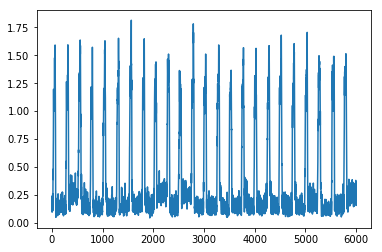

In [40]:
plt.plot(f10[int(36000*2.5):int(36000*(2.5+(1/6)))])

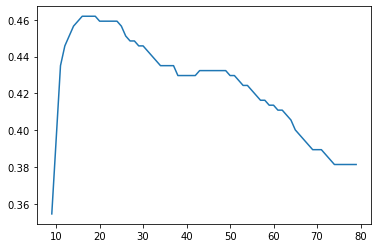

In [96]:
import pandas as pd
#plt.plot(spectrogram15min[:end,0])
#spectrogram1.shape
#freq is rounds per second, so to have speed I need m/s, so multiply it by length of flume
#speeds = pd.Series(11*frequencies5[np.argmax(spectrogram1,axis=0)[:]])
#speeds = pd.Series(11*frequencies5[np.argmax(spectrogram5,axis=0)[20:100]])
speeds = pd.Series(11*frequencies5[np.argmax(spectrogram10,axis=0)[20:100]])
plt.plot(speeds.rolling(window=10,center=False).mean())

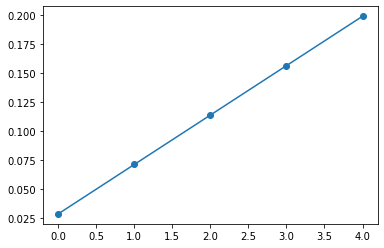

In [34]:
#plt.plot(np.argmax(spectrogram15min,axis=0))
plt.plot(times15min/3600, marker='o')

In [58]:
frequencies1[-1]

5.0

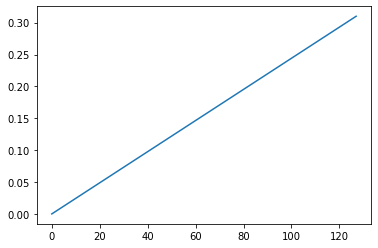

In [64]:
plt.plot(frequencies1[:end])